In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

In [30]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [31]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2,0


# Missing Value

In [4]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(train):
        # Total missing values
        mis_val = train.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(data)

Your selected dataframe has 19 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Type_Occupation,488,31.5
Annual_income,23,1.5
Birthday_count,22,1.4
GENDER,7,0.5


<Axes: >

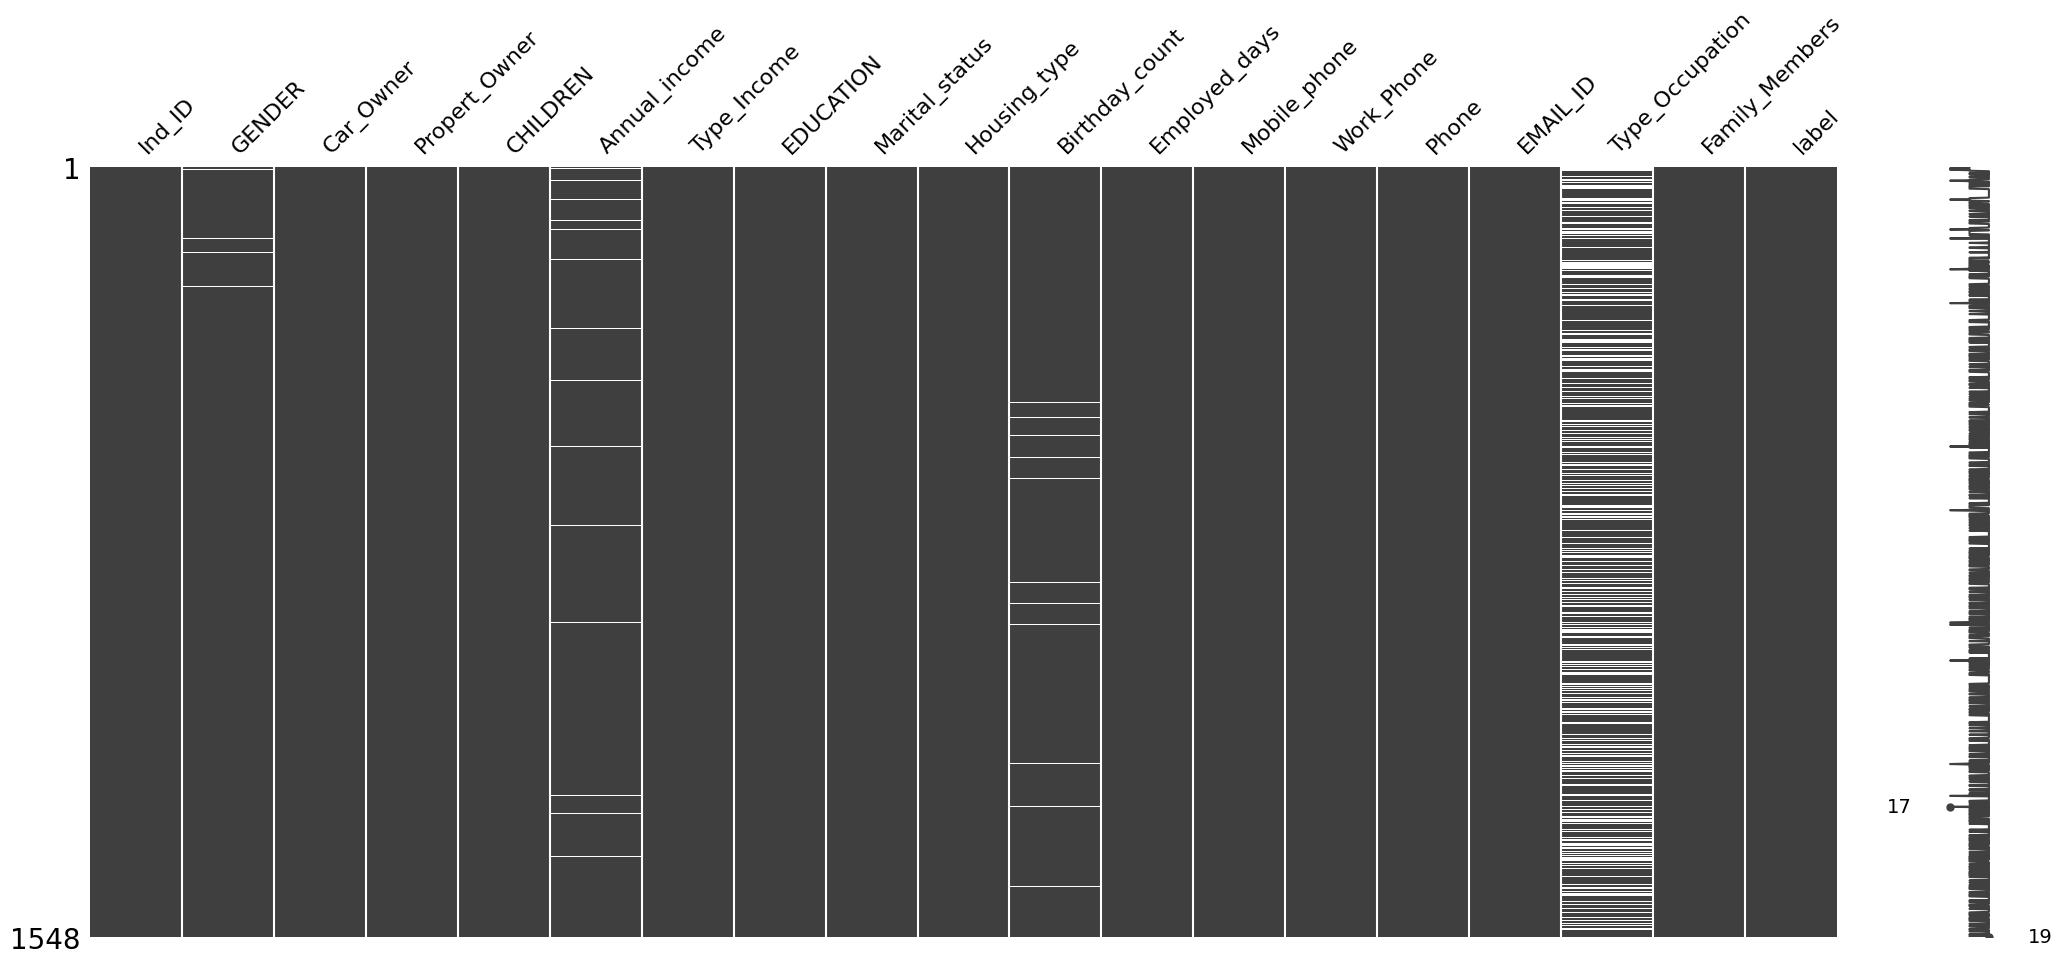

In [6]:
mno.matrix(data)

In [7]:
# Cek apakah ada row data duplikat
int(data.duplicated().sum())

0

In [8]:
# mendapatkan kolom-kolom dengan duplikasi values
duplicate_features = get_duplicate_features(data)
print('Duplikasi kolom:\n')
print(duplicate_features)

Duplikasi kolom:

Empty DataFrame
Columns: [Desc, feature1, feature2]
Index: []


# Visualisasi

In [32]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [33]:
# Ubah tipe Mobile_phone, Work_phone, Phone, Email, dan label menjadi kategori
data['Mobile_phone'] = data['Mobile_phone'].astype('category')
data['Work_Phone'] = data['Work_Phone'].astype('category')
data['Phone'] = data['Phone'].astype('category')
data['EMAIL_ID'] = data['EMAIL_ID'].astype('category')
data['label'] = data['label'].astype('category')

In [34]:
# Ambil fitur numerik dan kategorik
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=['object', 'category']).columns

## Histogram

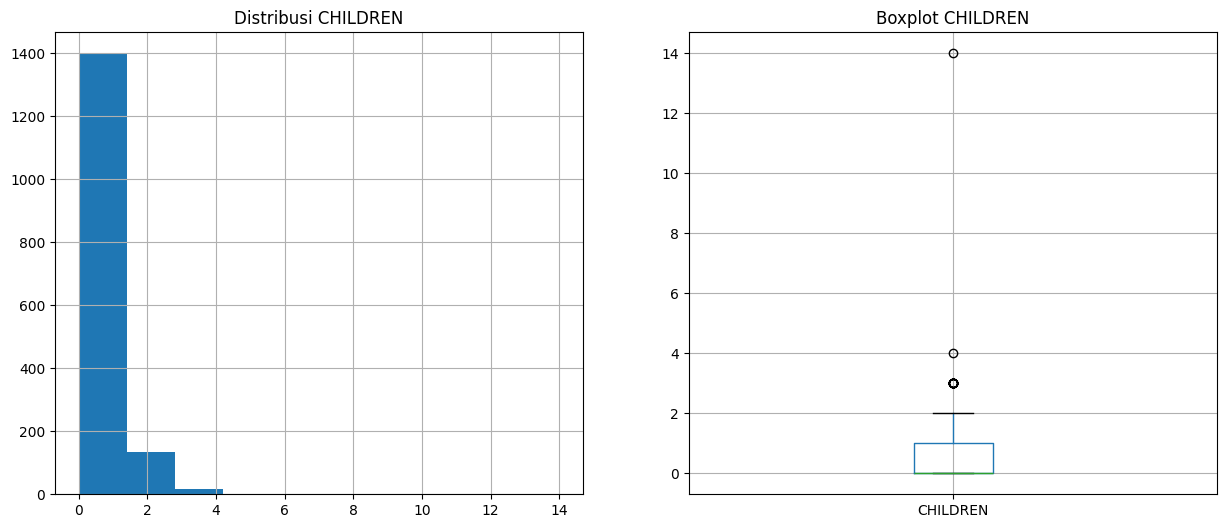

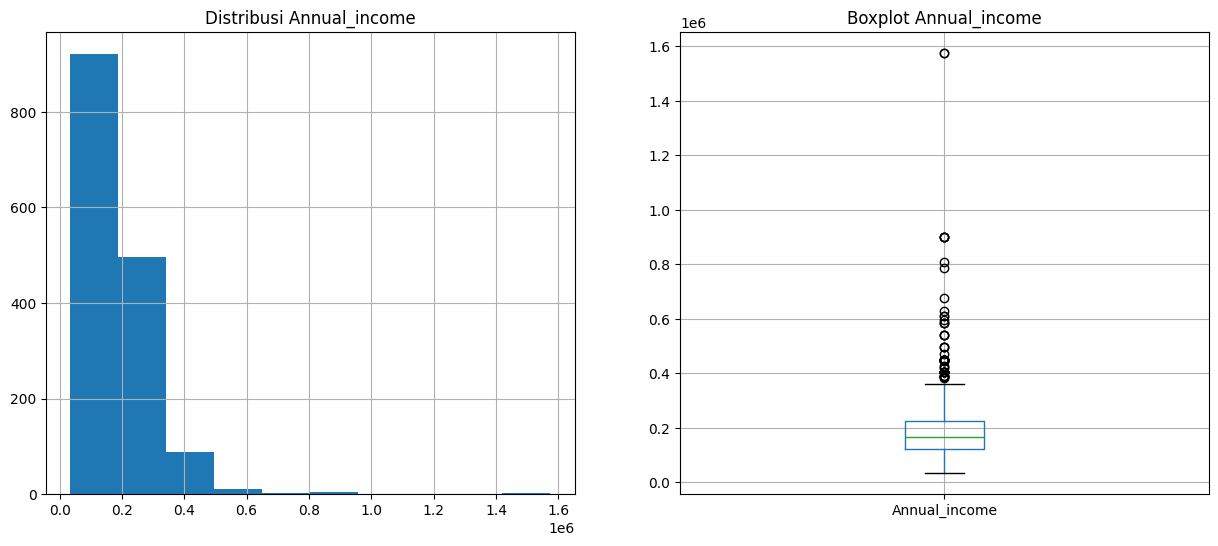

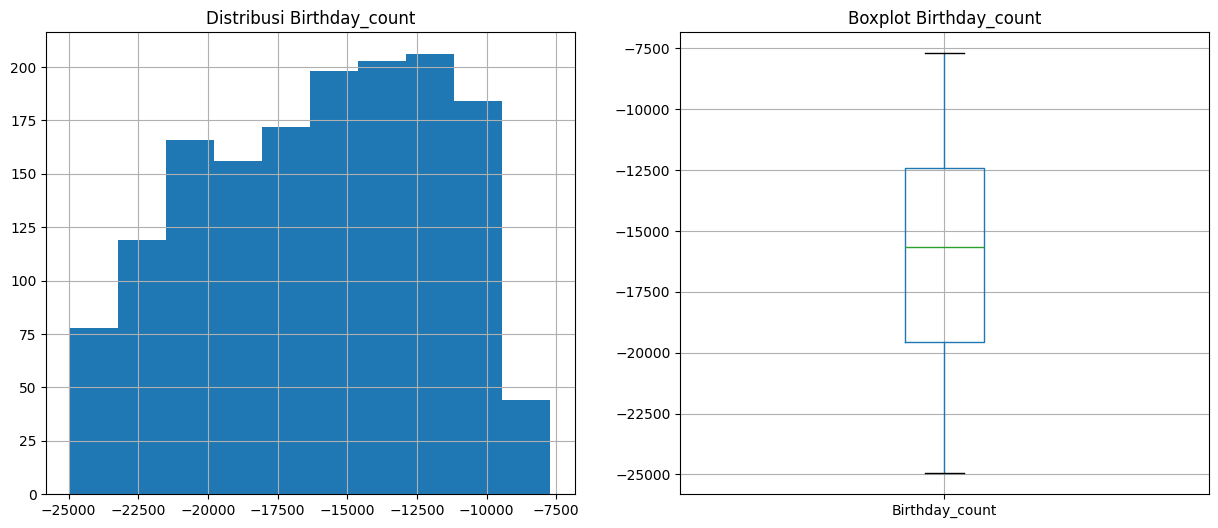

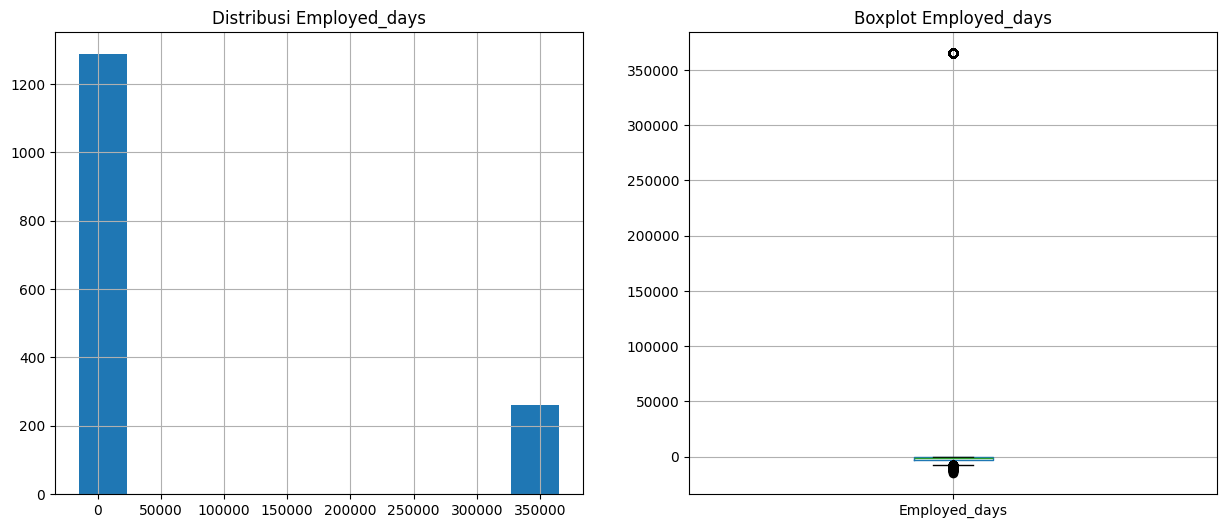

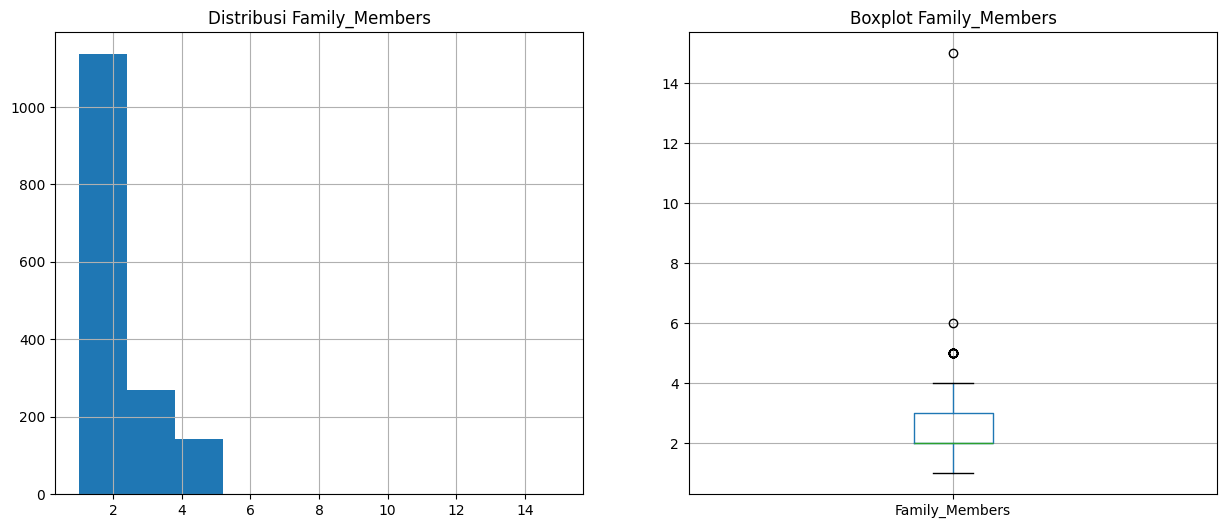

In [12]:
# Visualisasi distribusi data numerik dan boxplotnya yang hasilnya jejeran.
for feature in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[feature].hist()
    plt.title('Distribusi ' + feature)
    plt.subplot(1, 2, 2)
    data.boxplot(column=feature)
    plt.title('Boxplot ' + feature)
    plt.show()

## Barchart

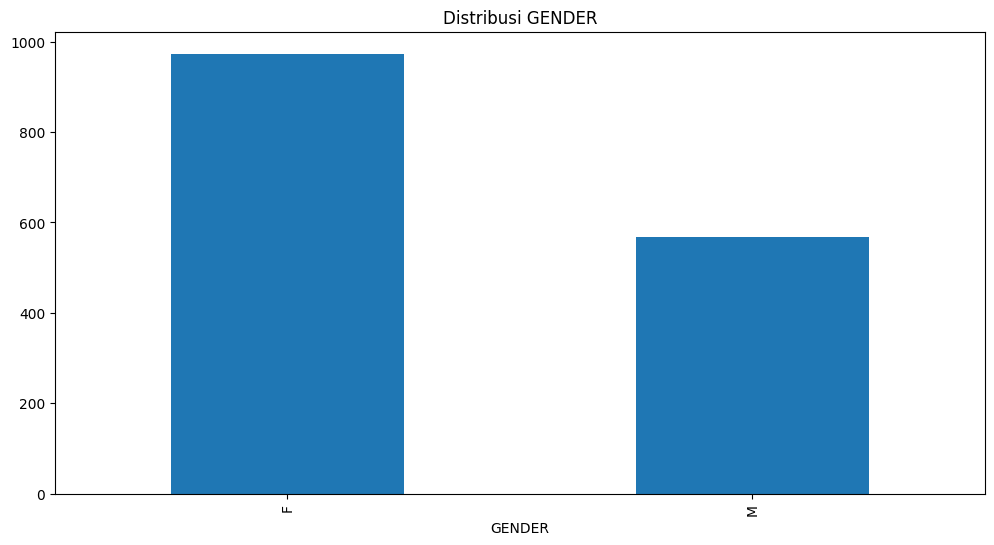

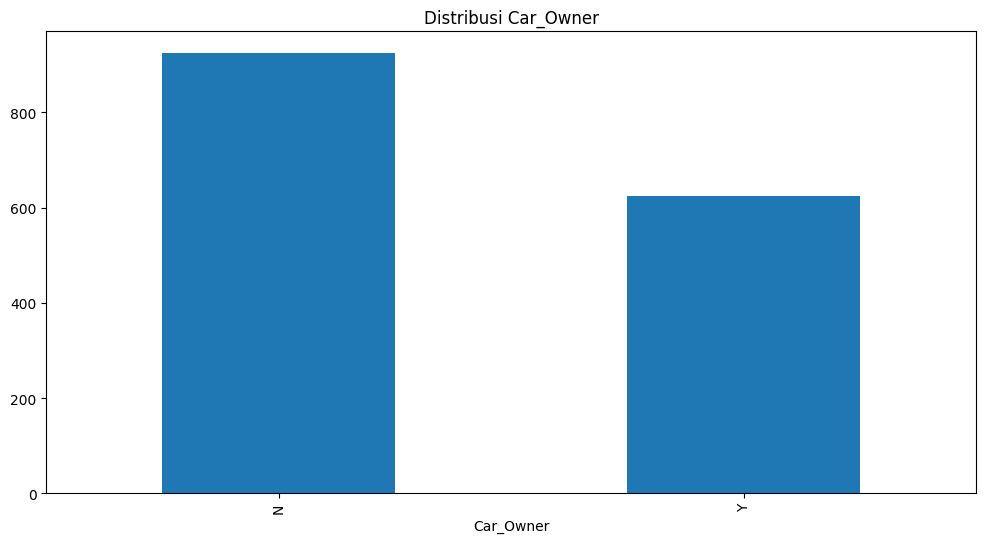

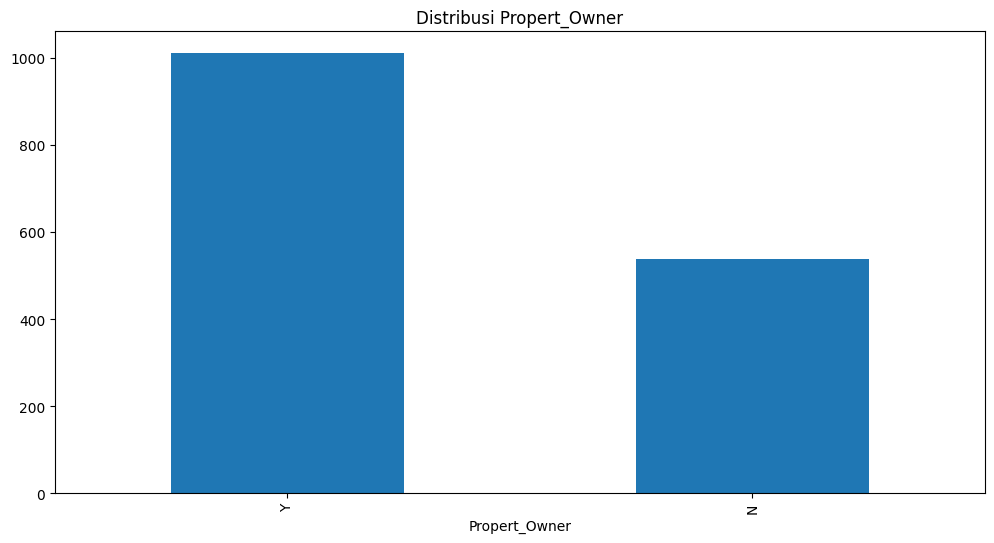

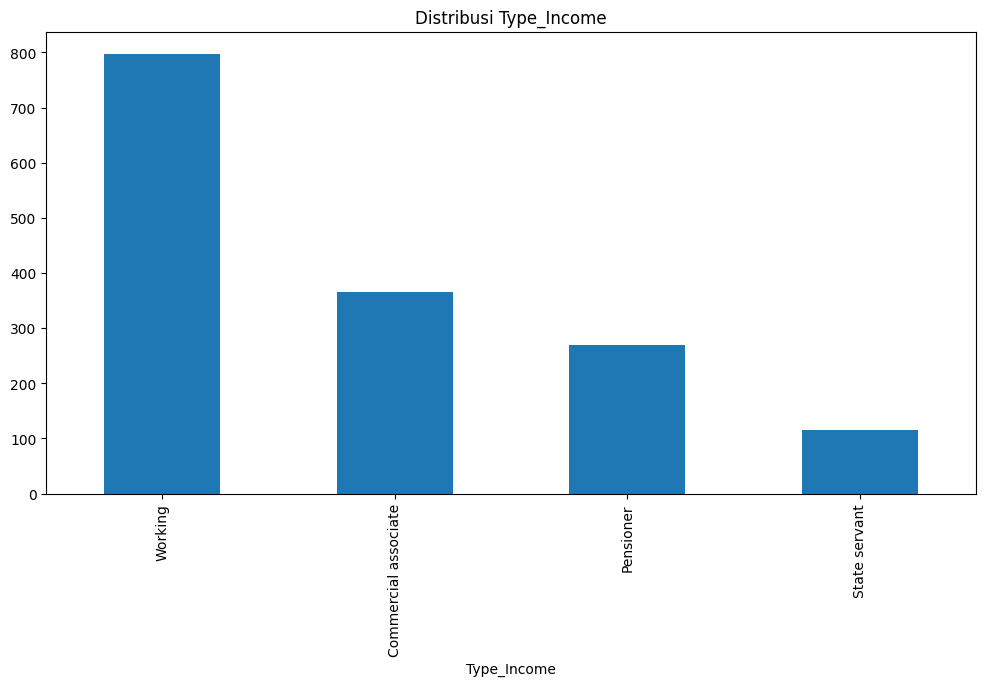

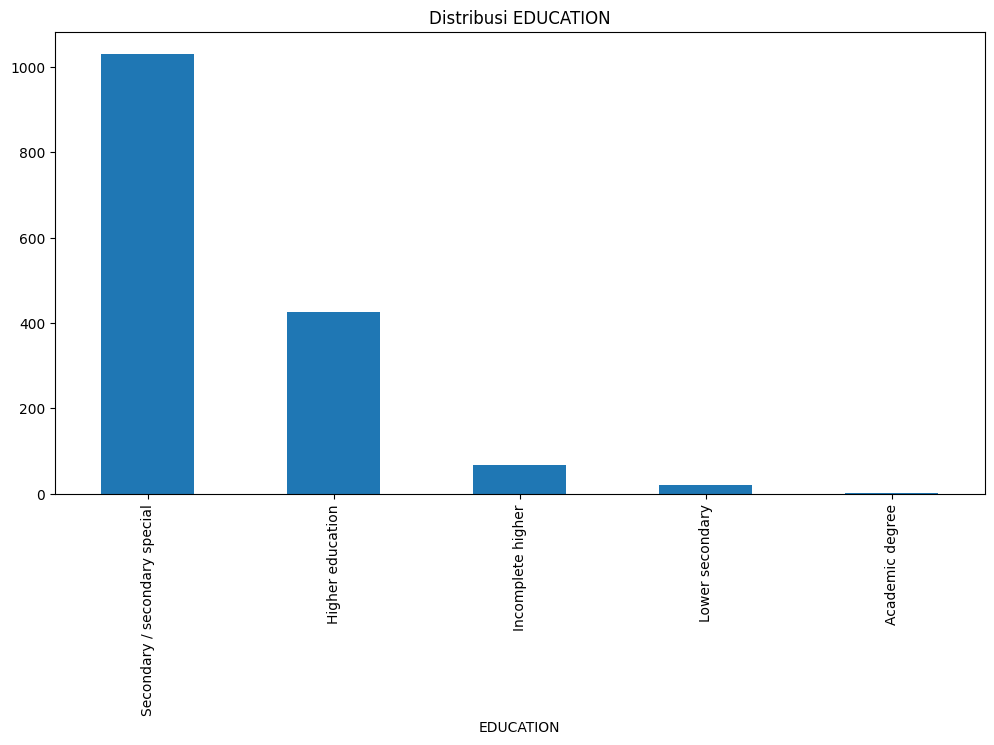

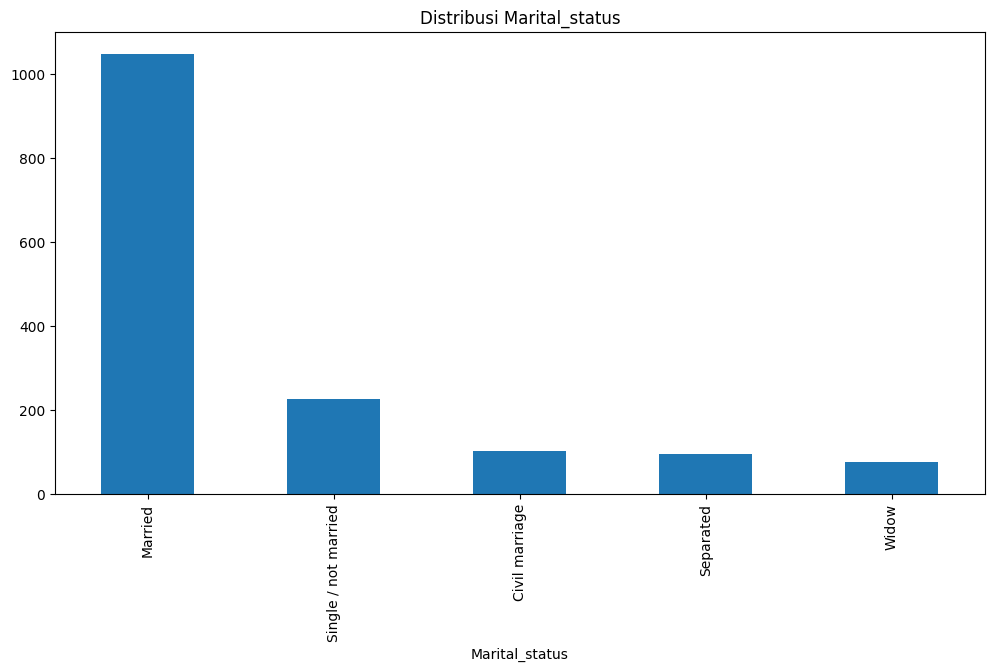

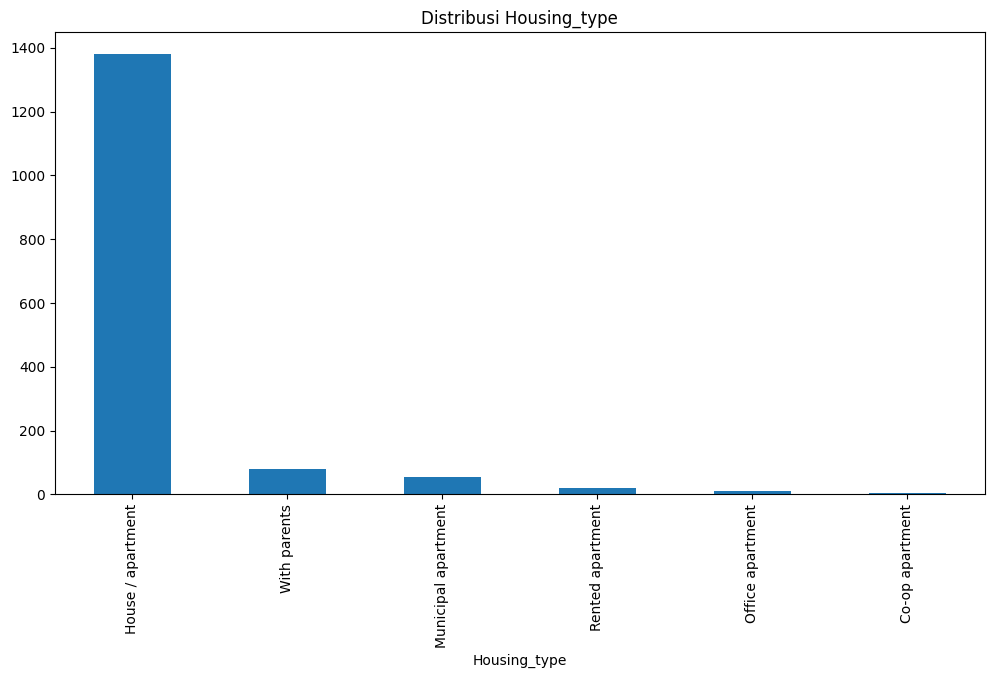

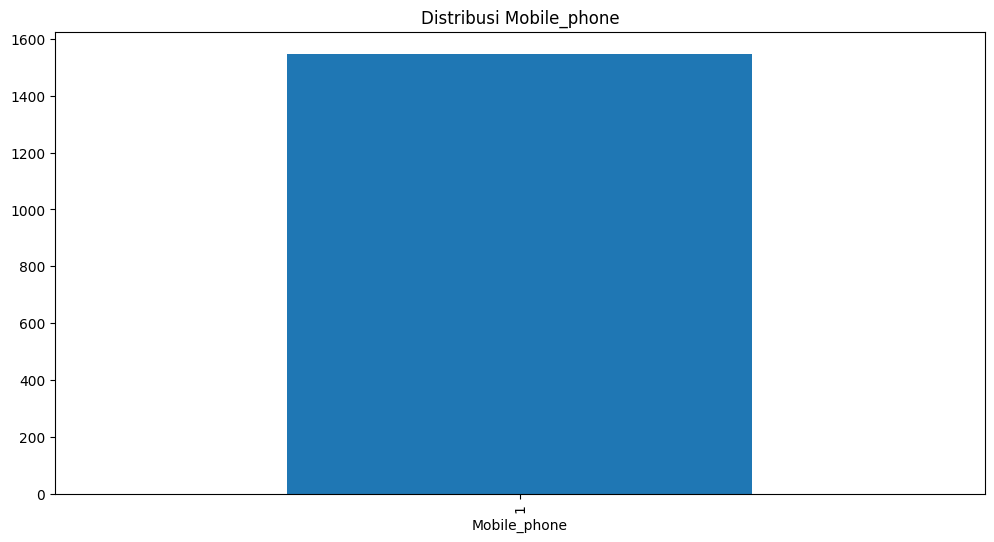

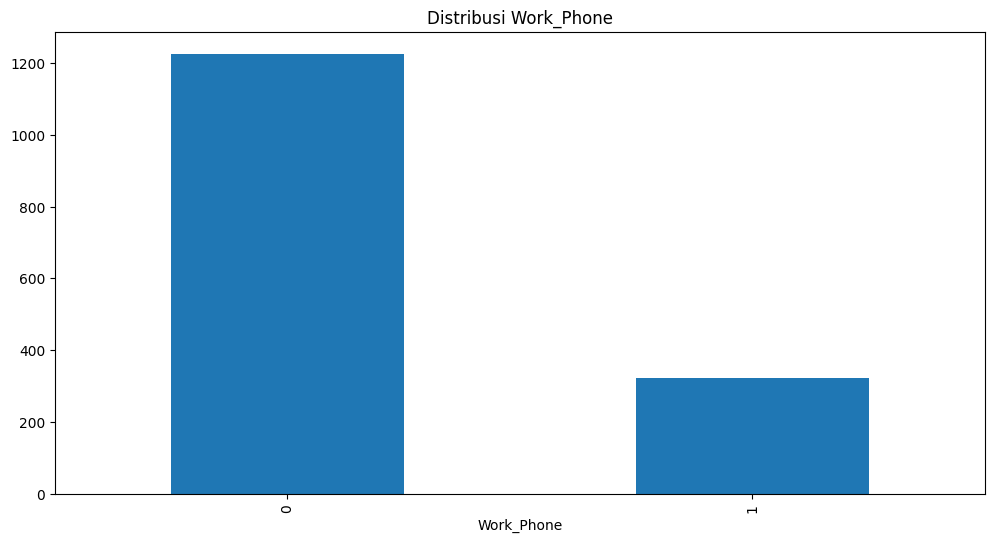

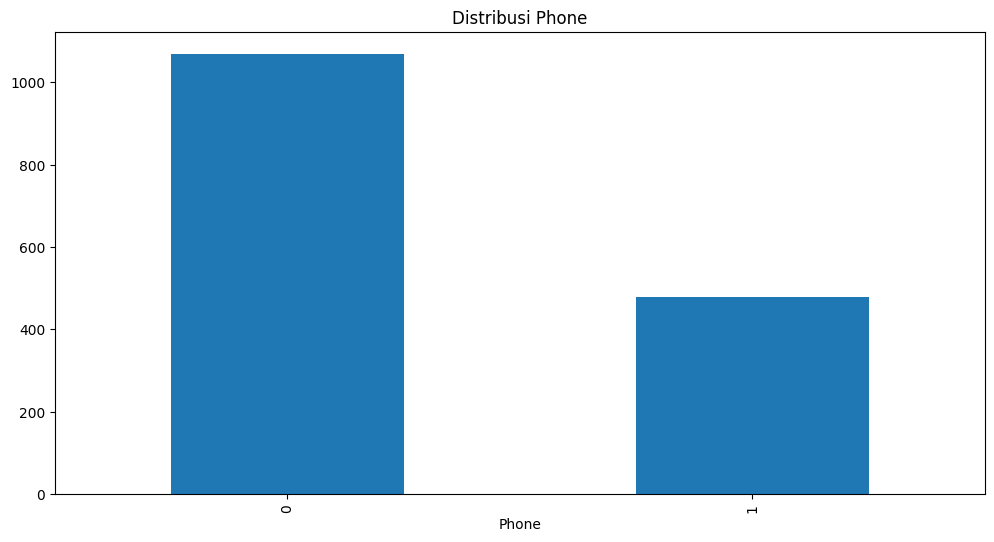

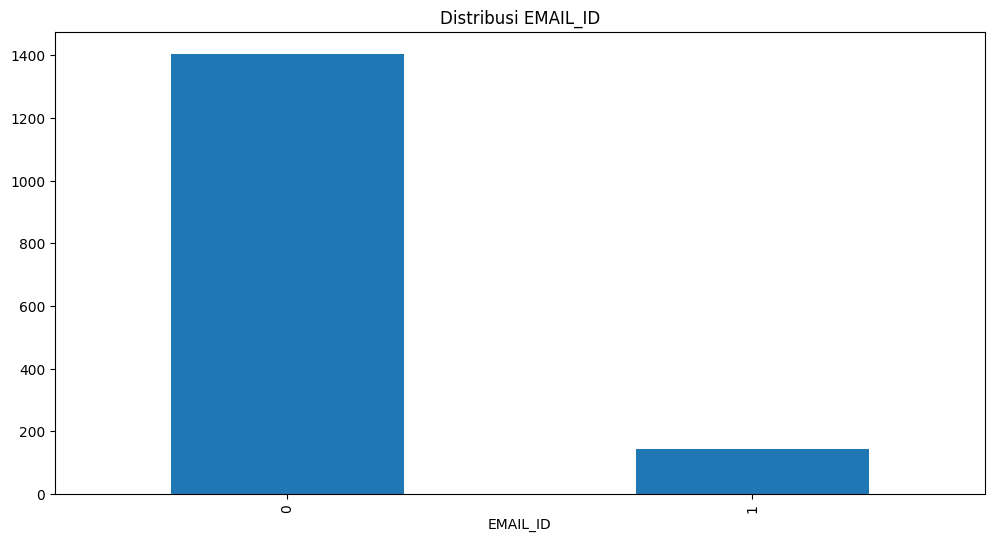

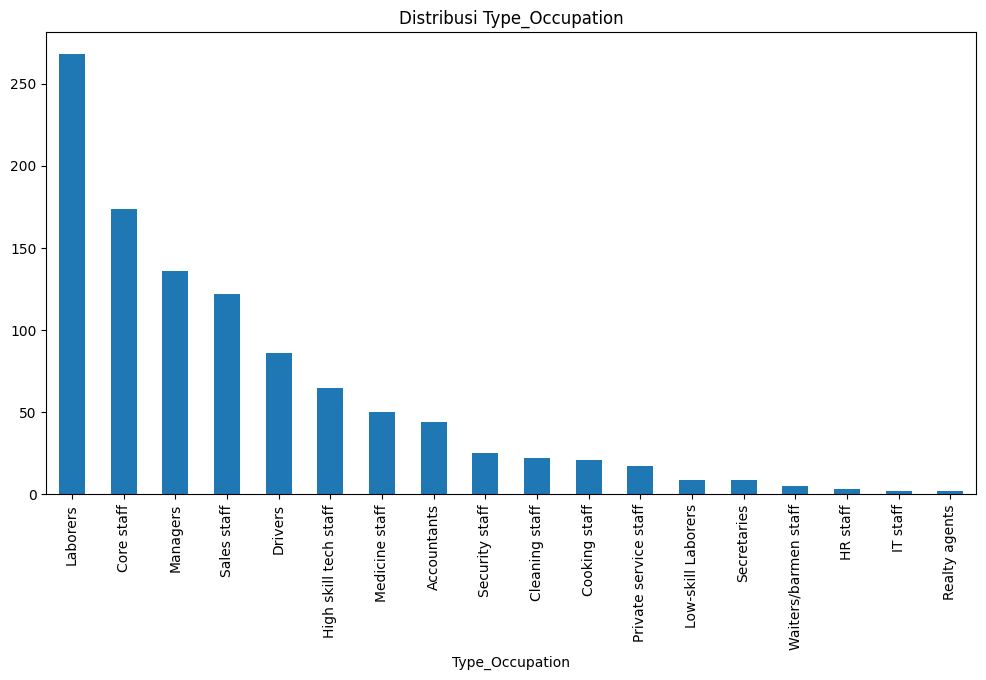

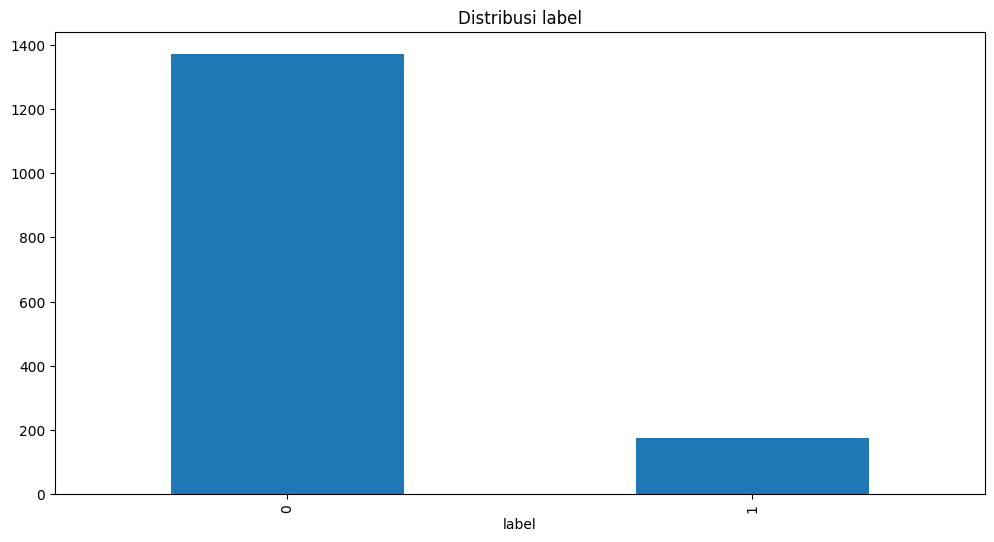

In [13]:
# Membuat barchart untuk data kategorik
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    data[feature].value_counts().plot(kind='bar')
    plt.title('Distribusi ' + feature)
    plt.show()

In [15]:
categorical_features

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'label'],
      dtype='object')

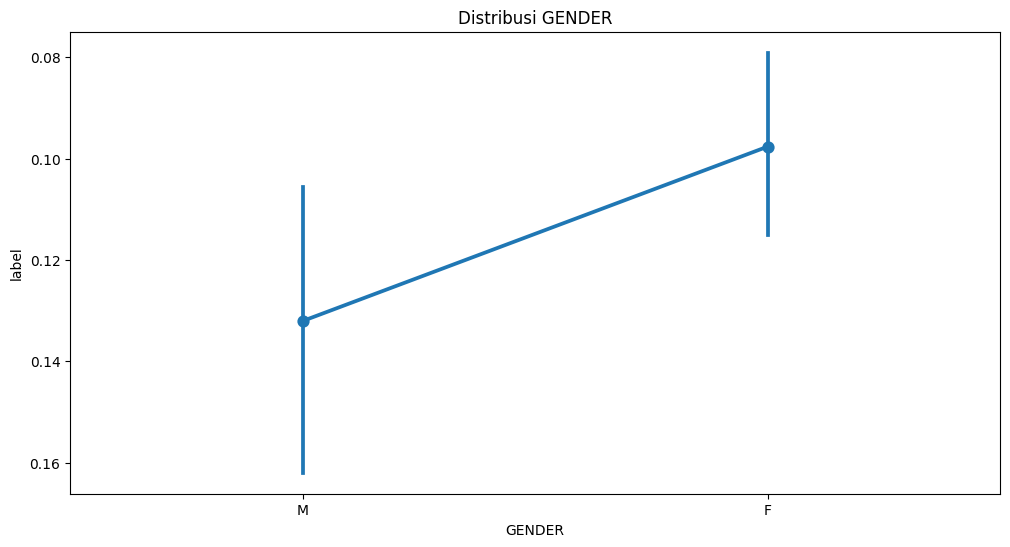

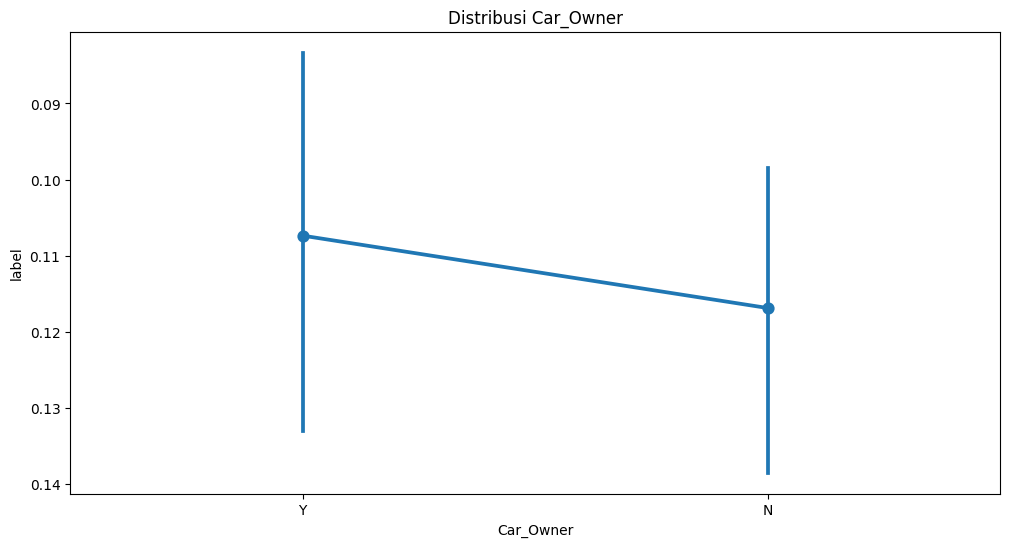

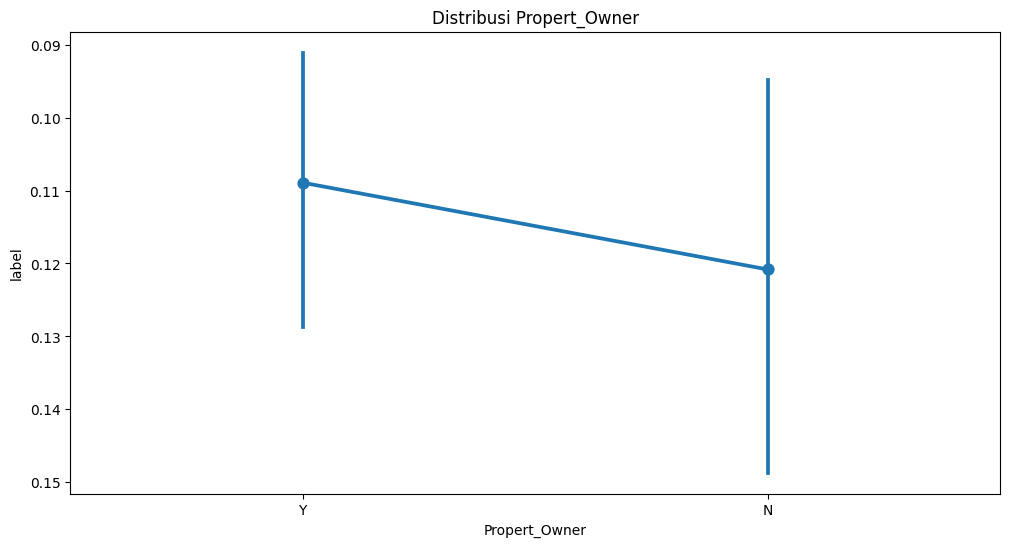

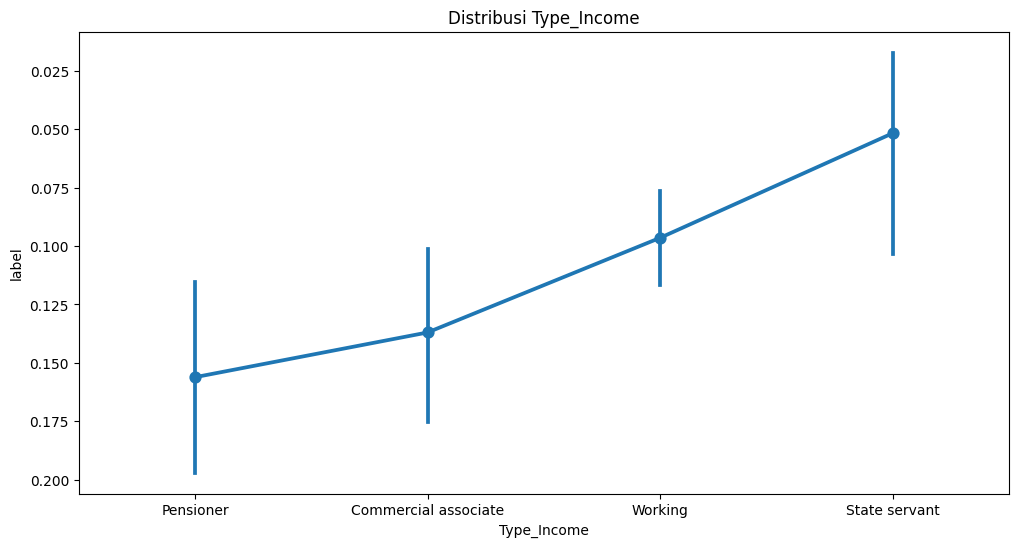

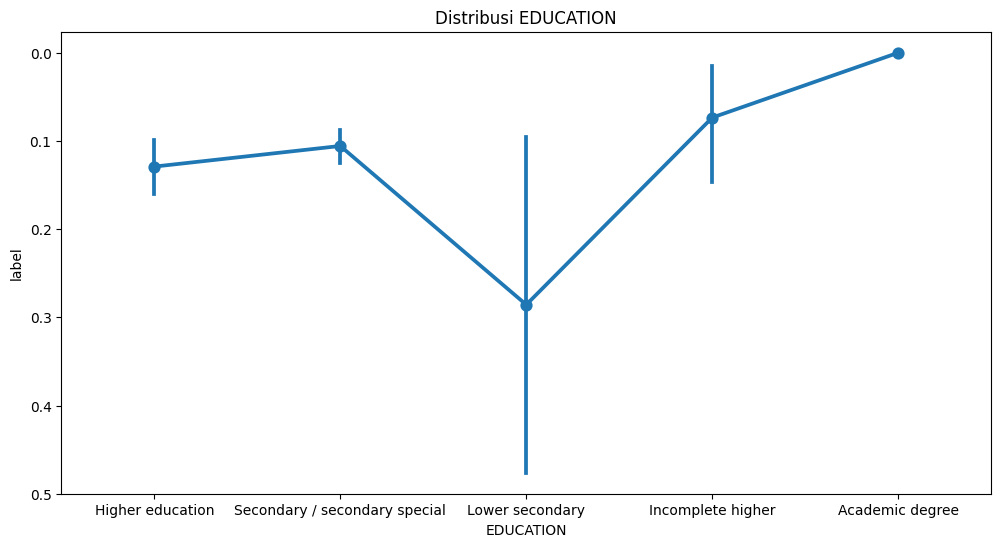

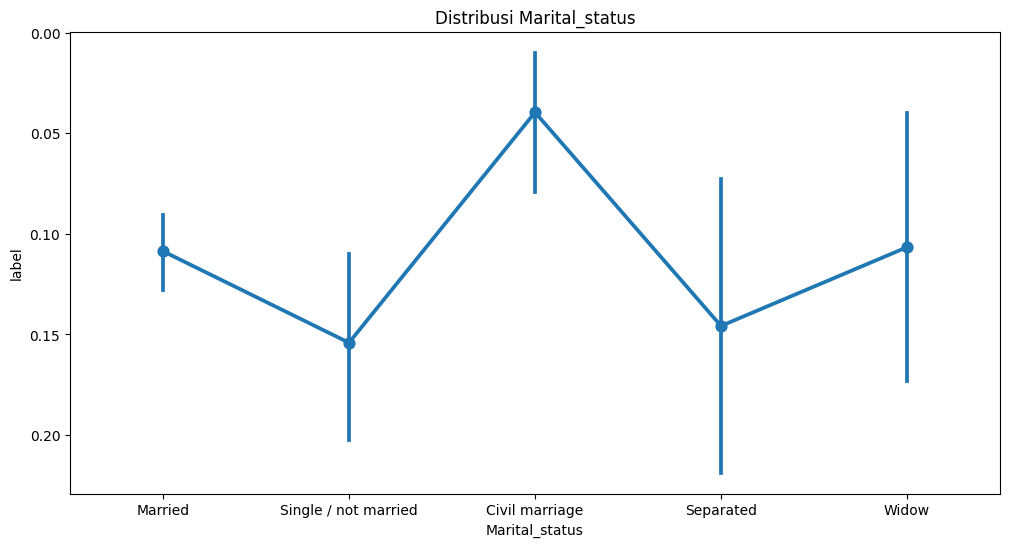

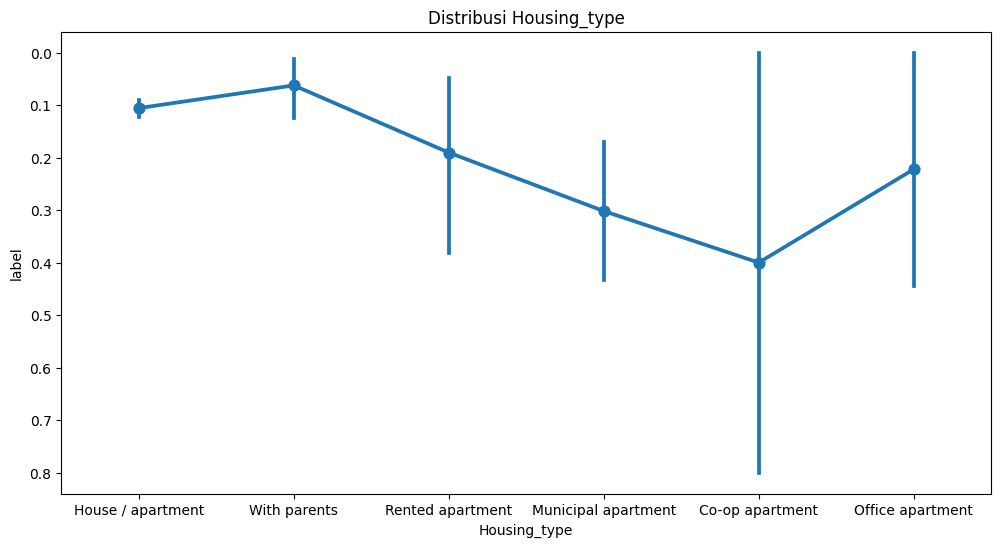

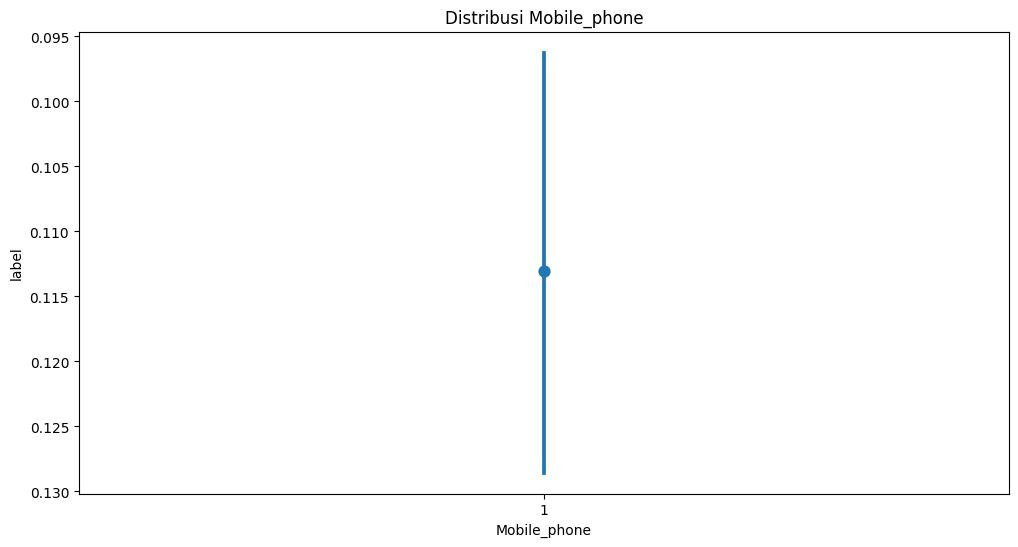

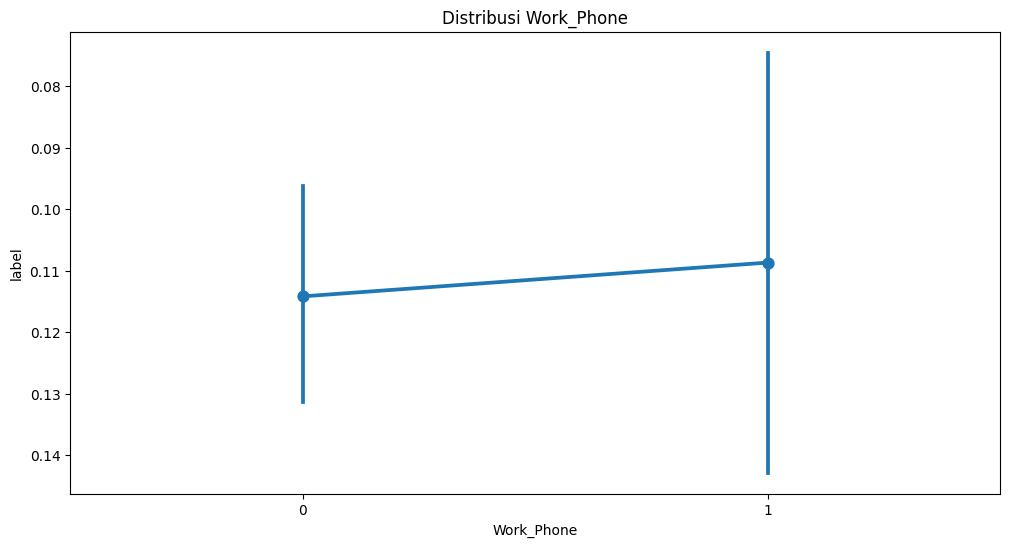

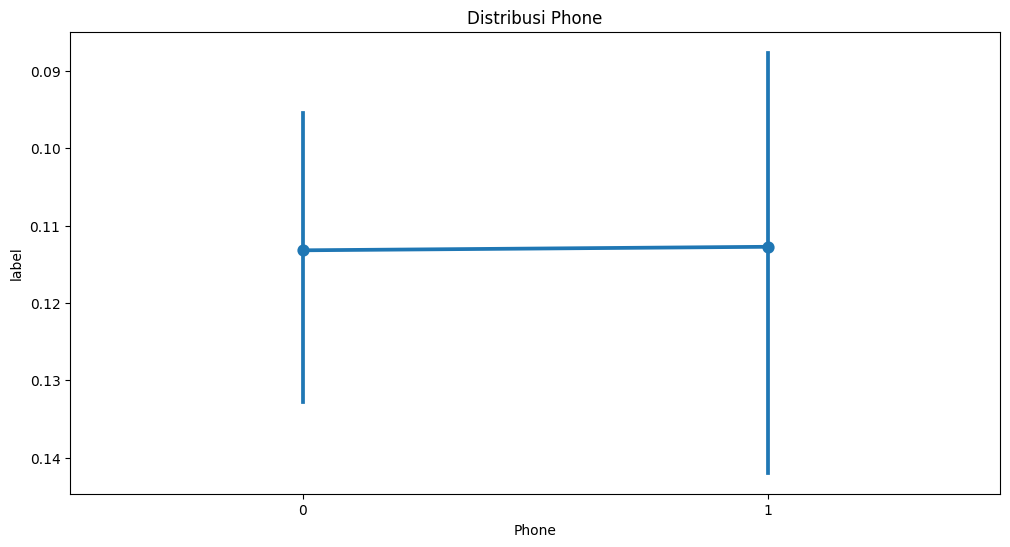

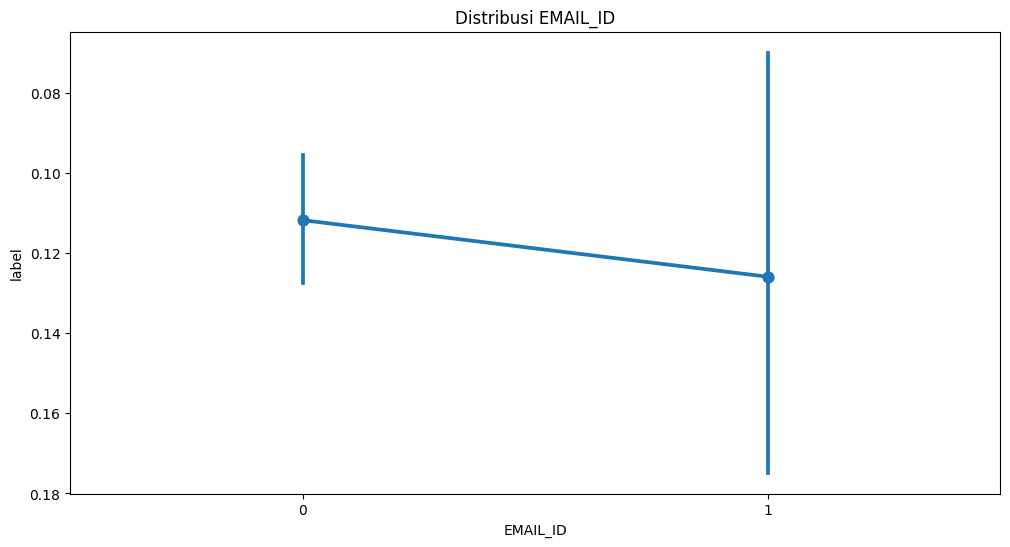

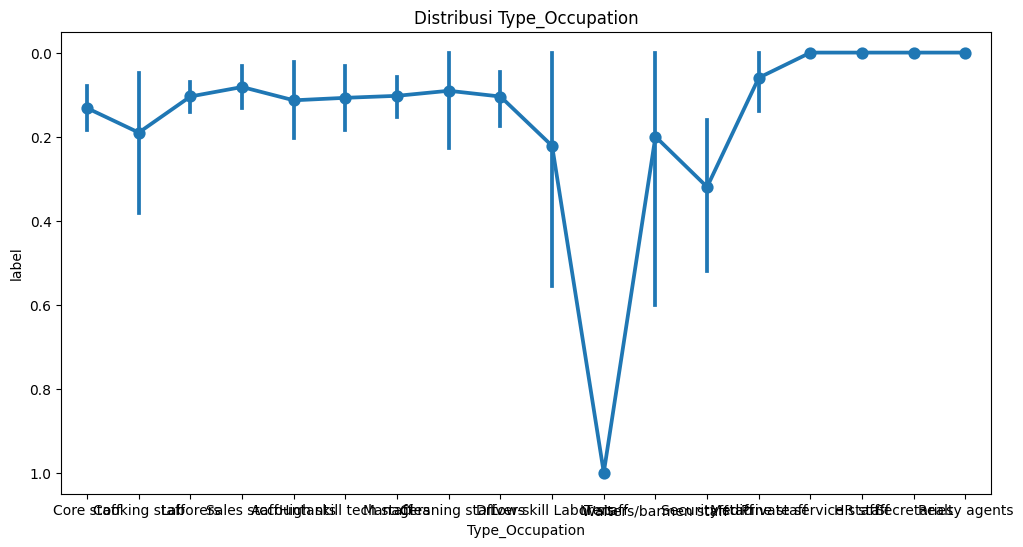

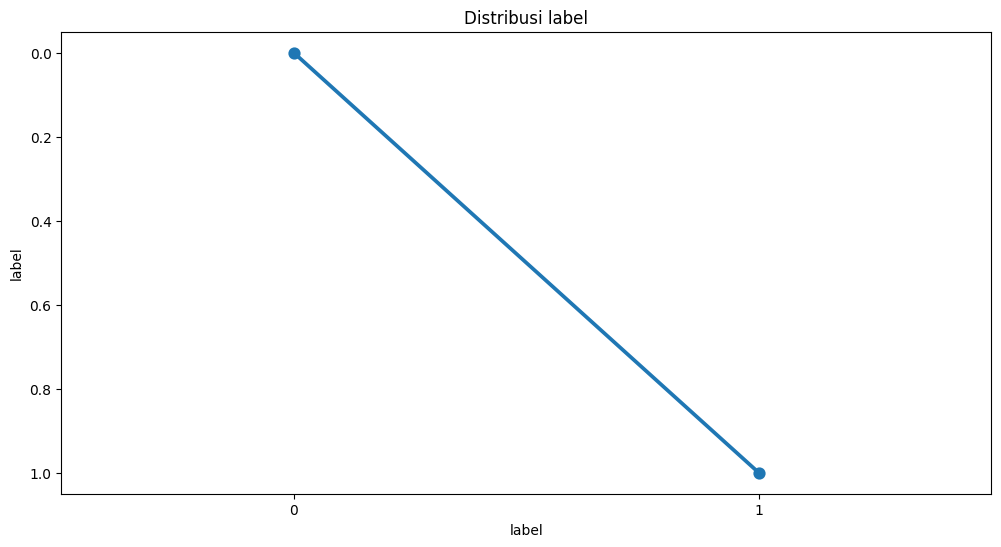

In [17]:
# Make point plot to see the relationship between categorical features and label
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    sns.pointplot(data=data, x=feature, y='label')
    plt.title('Distribusi ' + feature)
    plt.show()

# Scatter plot

c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

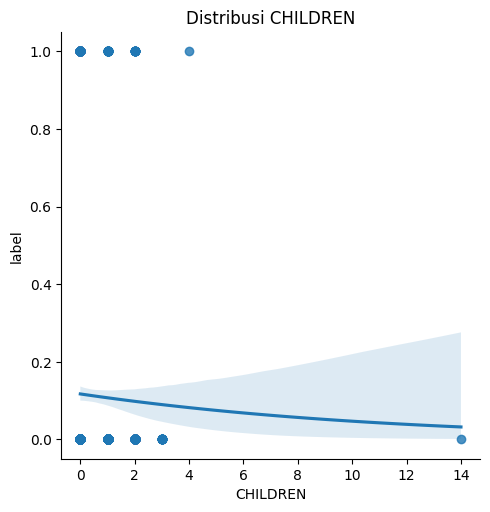

c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

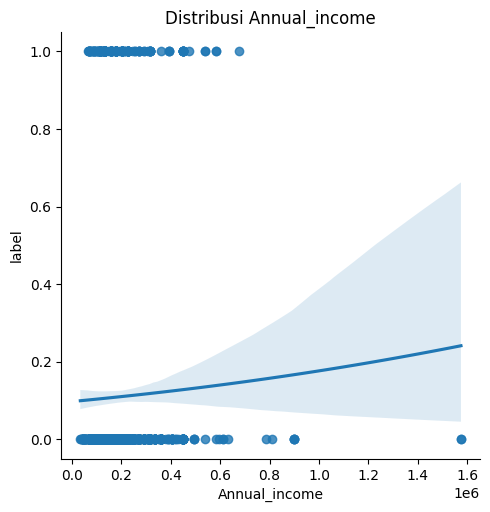

c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

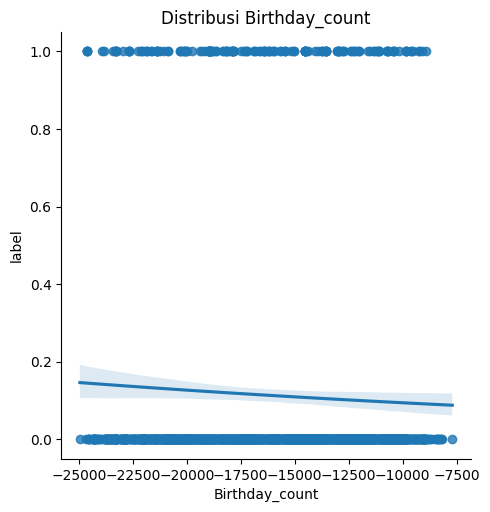

c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

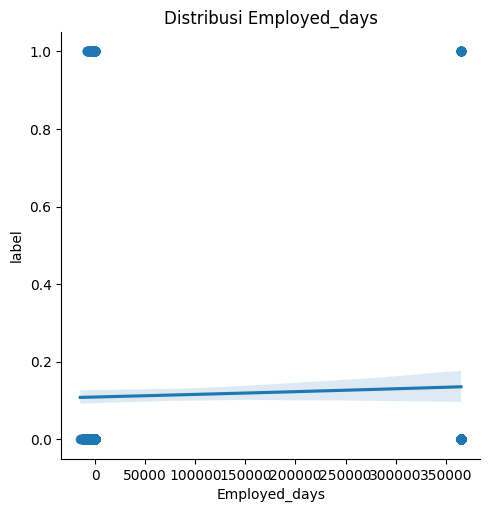

c:\Users\daffa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

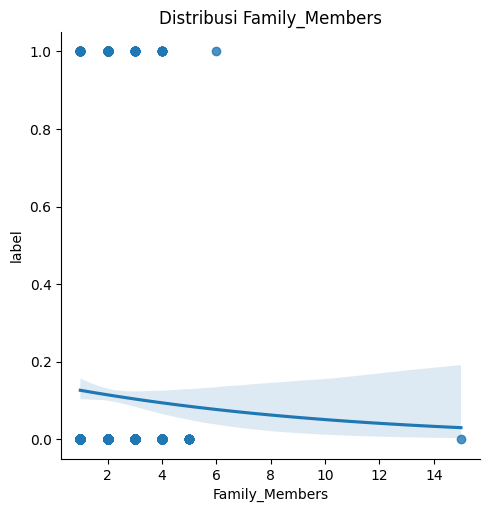

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Importing statsmodels after installation

# Assuming 'data' is your DataFrame and 'numerical_features' is a list of numeric columns
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.lmplot(data=data, x=feature, y='label', logistic=True)
    plt.title('Distribusi ' + feature)
    plt.show()


RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

<Figure size 1200x600 with 0 Axes>

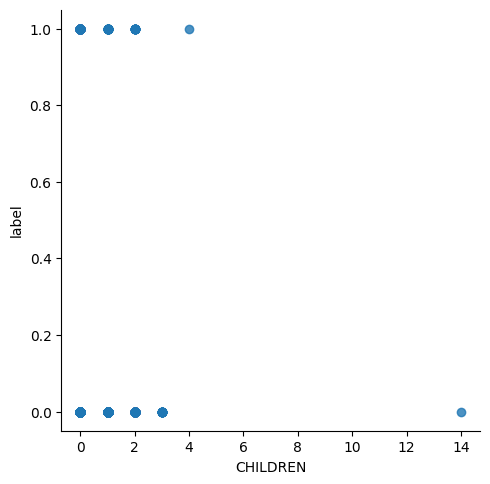

In [21]:
# Make a logisics plot to see the relationship between numerical features and label
for feature in numerical_features:
    plt.figure(figsize=(12,6))
    sns.lmplot(data=data, x=feature, y='label', logistic=True)
    plt.title('Distribusi ' + feature)
    plt.show()

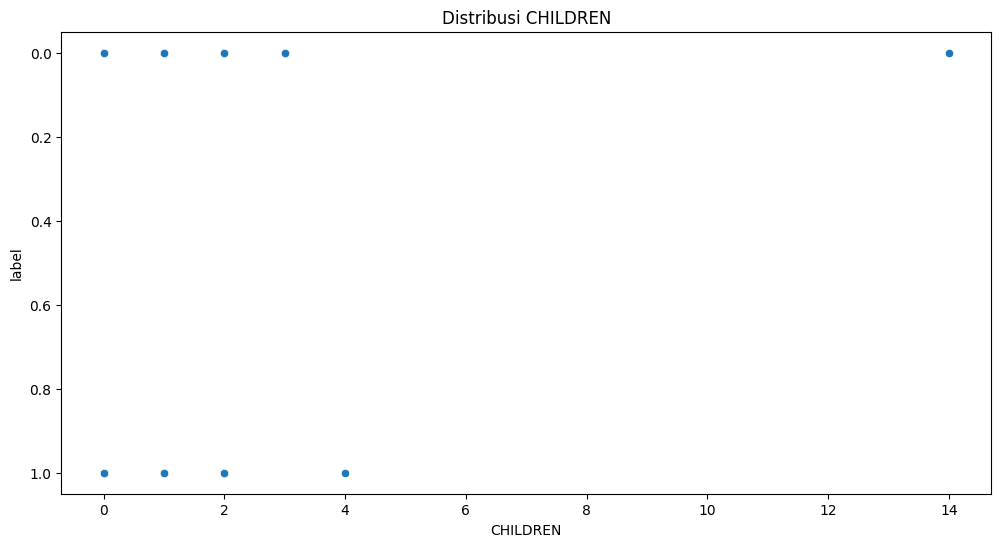

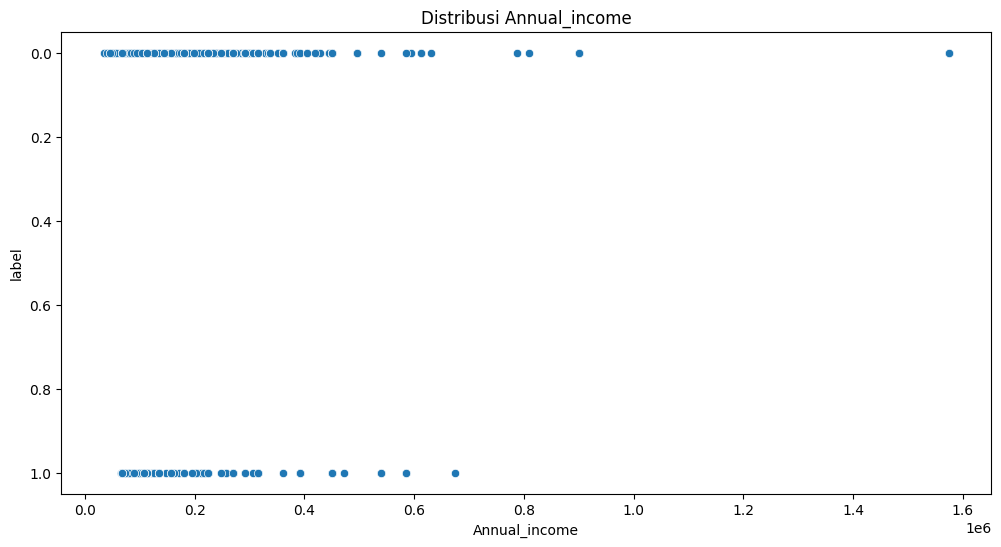

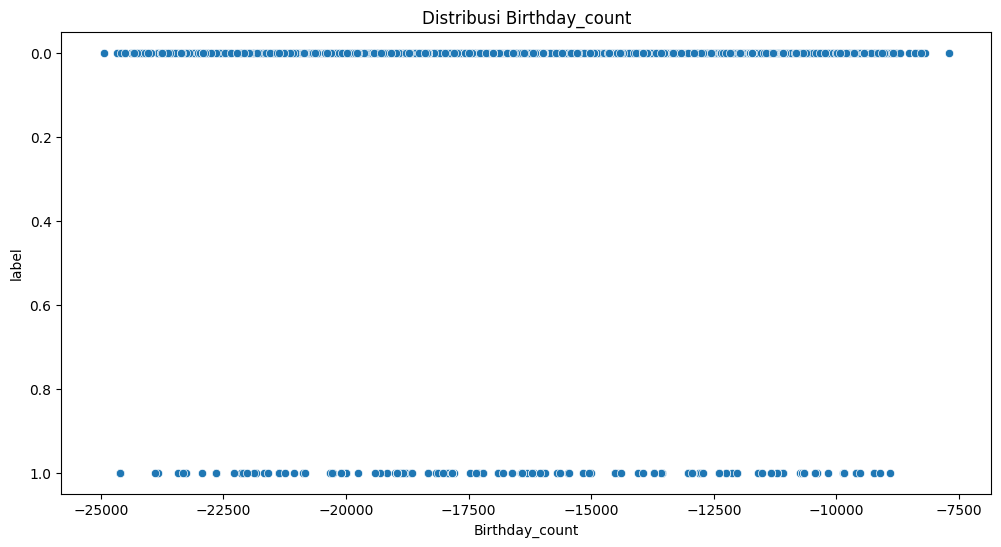

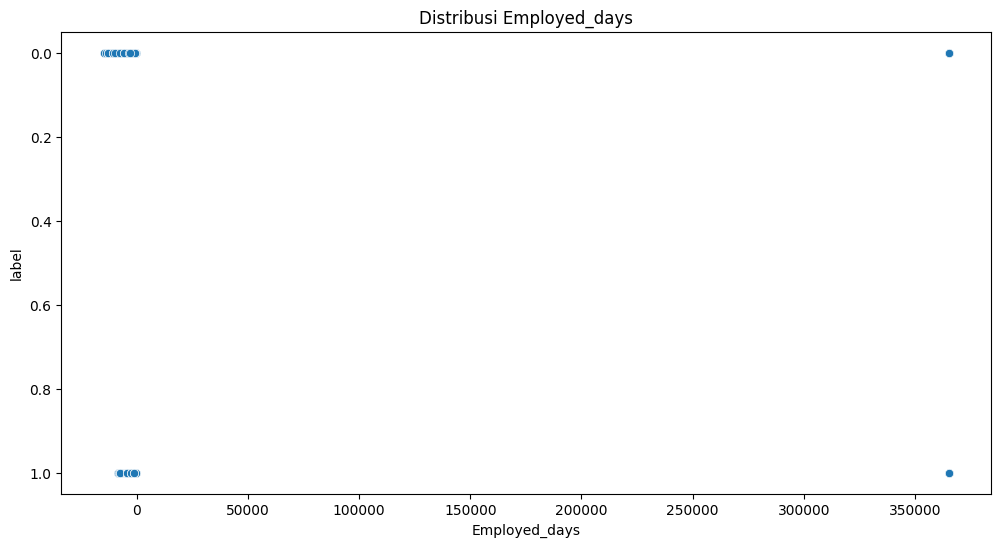

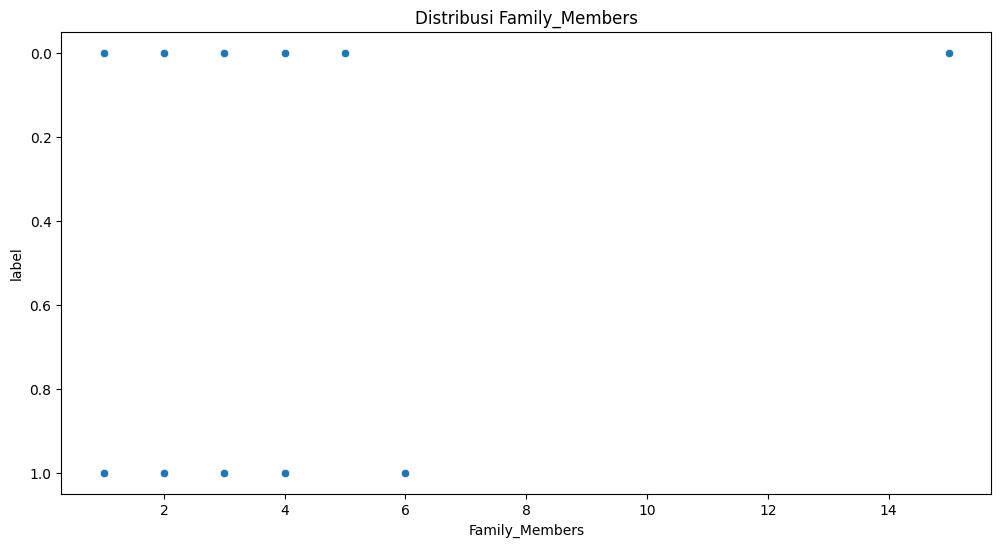

In [19]:
# Make scatter plot to see the relationship between numerical features and label
for feature in numerical_features:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=data, x=feature, y='label')
    plt.title('Distribusi ' + feature)
    plt.show()

In [35]:
import pandas as pd

# Define a function to remove extreme outliers
def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example: Apply the function to each numerical feature
for feature in numerical_features:
    data = remove_extreme_outliers(data, feature)


(1092, 18)


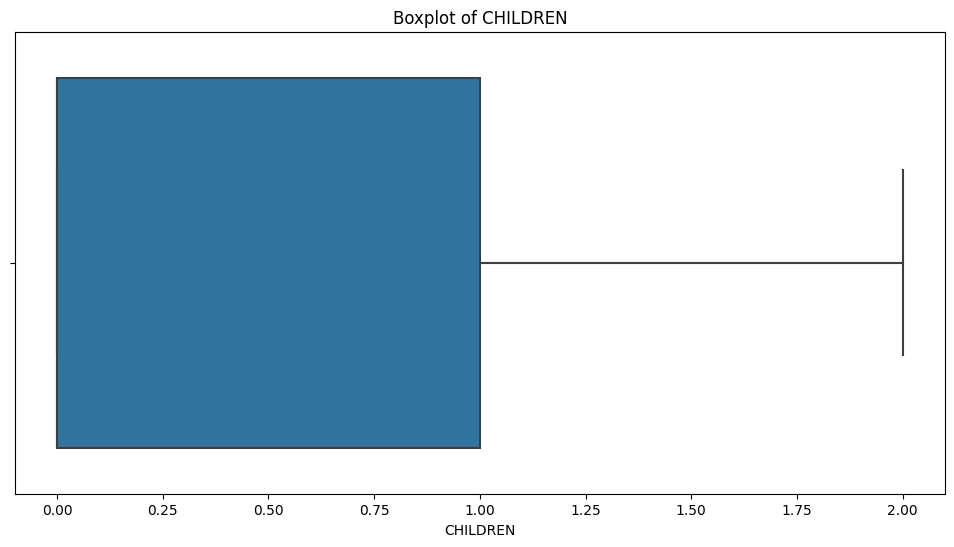

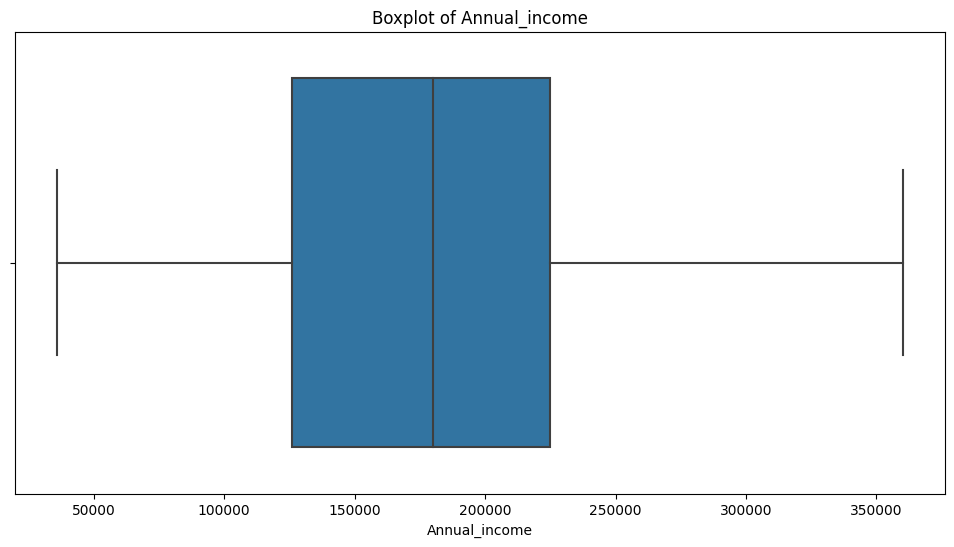

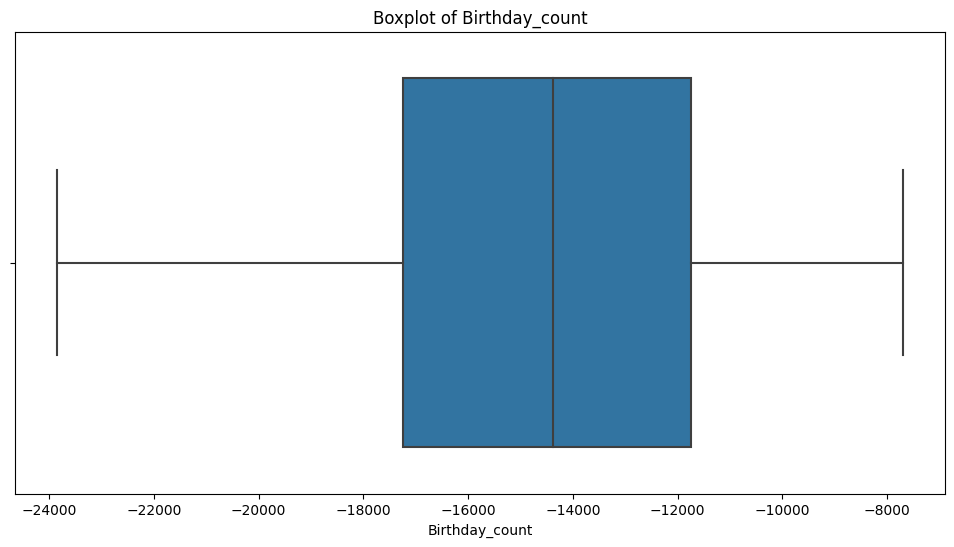

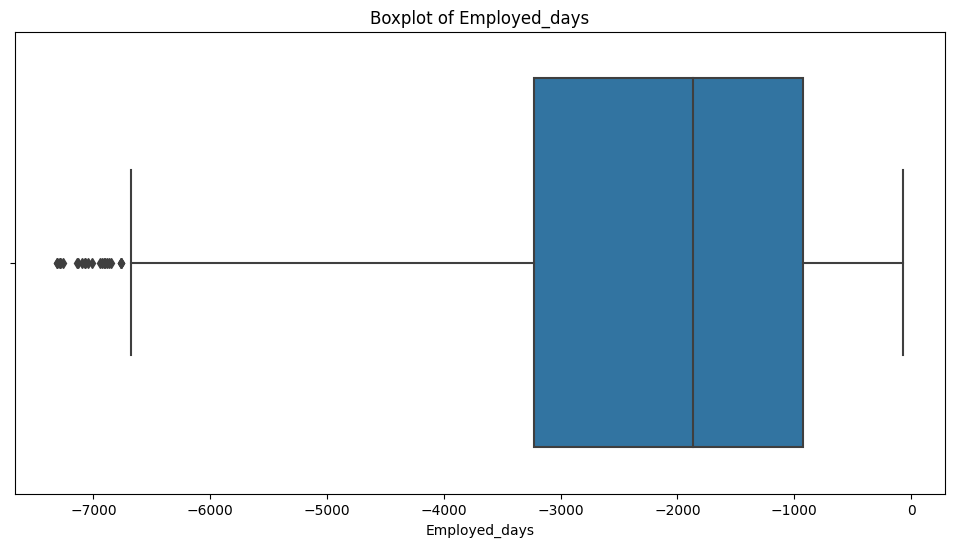

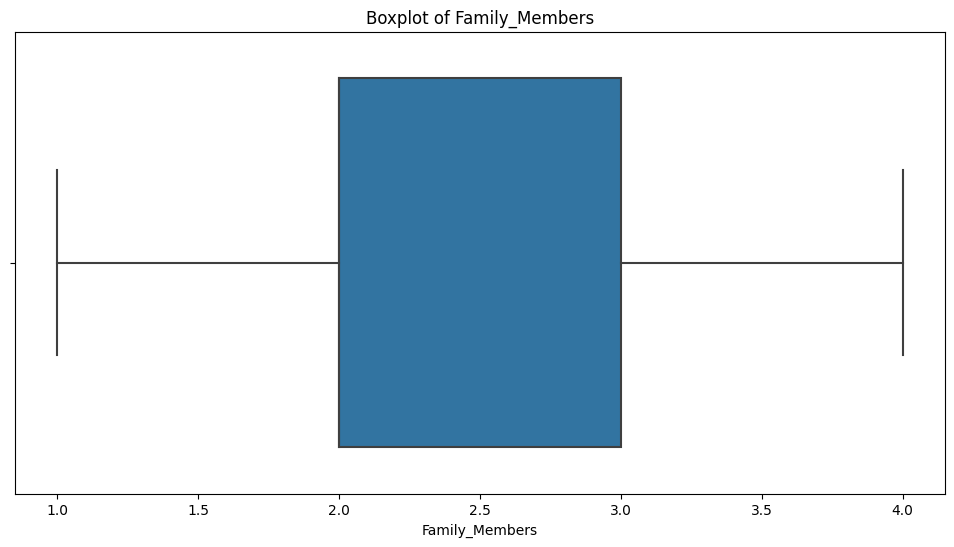

In [36]:
# Check the shape of the data after removing outliers
print(data.shape)

# Optionally, visualize the features again to confirm the outlier removal
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=feature)
    plt.title('Boxplot of ' + feature)
    plt.show()


In [12]:
data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
8,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [13]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Prepo 1 (Visualisasi)
import missingno as mno
from fast_ml.feature_selection import get_duplicate_features

# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Score
from sklearn.metrics import accuracy_score, make_scorer


In [37]:
X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

In [39]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [40]:
from imblearn.over_sampling import ADASYN
from lazypredict.Supervised import LazyClassifier

In [43]:
# Step 4: Set Up Undersampling with TomekLinks
from imblearn.under_sampling import TomekLinks

undersampler = TomekLinks()


In [44]:
# Step 4: Create and Apply Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Step 5: Oversampling
# oversampler = ADASYN(random_state=42)
undersampler = TomekLinks()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Step 6: Use LazyPredict
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test_processed, y_train_resampled, y_test)

print(models)

 93%|█████████▎| 27/29 [00:05<00:00,  6.96it/s]

[LightGBM] [Info] Number of positive: 784, number of negative: 792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2508
[LightGBM] [Info] Number of data points in the train set: 1576, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497462 -> initscore=-0.010152
[LightGBM] [Info] Start training from score -0.010152


100%|██████████| 29/29 [00:06<00:00,  4.66it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.90               0.71     0.71      0.89   
RandomForestClassifier             0.91               0.70     0.70      0.90   
XGBClassifier                      0.90               0.70     0.70      0.89   
LGBMClassifier                     0.90               0.69     0.69      0.89   
ExtraTreesClassifier               0.92               0.69     0.69      0.90   
DecisionTreeClassifier             0.84               0.66     0.66      0.84   
ExtraTreeClassifier                0.83               0.64     0.64      0.83   
LabelPropagation                   0.84               0.62     0.62      0.83   
LabelSpreading                     0.84               0.62     0.62      0.83   
KNeighborsClassifier               0.68               0.60     0.60      0.73   
QuadraticDiscriminantAnalysi